# Quiz Pratico 1 - Lucía Manso

In [1]:
#todos os seus imports aqui
import pandas as pd
# For the boxplot
import matplotlib.pyplot as plt
# Source: https://www.statology.org/pandas-scatter-plot/

---

# Notas preliminares

Esta é uma avaliação formal. Conta para 15% da sua nota final. Por favor, observe as seguintes regras durante toda a avaliação:

1. Não pode falar com outros estudantes a partir do momento em que a avaliação
começa.
2. Haverá 15 minutos no início para colocar perguntas, 5 minutos a meio e outros 5 minutos perto do final do teste. Aguarde que o seu professor indique quando pode colocar perguntas.
3. Apenas pode consultar o site da documentação de Python.
4. Não pode consultar quaisquer cadernos anteriores que tenha criado ou que lhe tenham sido partilhados.
5. Todas as fórmulas matemáticas necessárias estão incluídas aqui.
6. Só pode ter o Jupyter Python e uma janela de navegador aberta na documentação de Python. Qualquer outra janela ou aplicação aberta pode invalidar o seu teste.
7. É proibida a distribuição dos conteúdos deste teste.
Não pode utilizar qualquer assistente de inteligência artificial.

---

# Quiz 1

1 - Vamos utilizar o dataset `Auto` para compreender o consumo de combustível dos carros. Como primeira atividade, faça o load do dataset fornecido pelo instrutor.

In [2]:
#open dataset in pandas
import pandas as pd
df = pd.read_csv('Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [43]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin,most-recent
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307,0.541562
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549,0.498898
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


2 - Se precisar de mais informações sobre o dataset, consulte o [link](https://islp.readthedocs.io/en/latest/datasets/Auto.html). Utilizando o conjunto de dados, tente responder à pergunta sobre quais são as idades máxima e mínima dos carros no dataframe e qual o consumo (mpg) máximo e mínimo dos carros. Use um histograma `.hist()` para tirar as suas conclusões.

Max year:  82
Min year:  70
Max mpg:  46.6
Min mpg:  9.0


<Axes: >

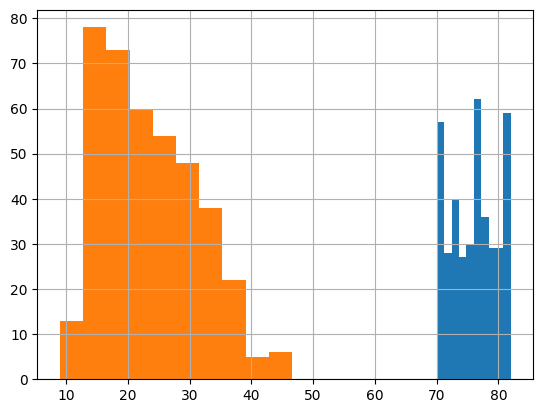

In [15]:
print("Max year: ", df['year'].max())
print("Min year: ", df['year'].min())
# La edad maxima = 82 | La edad mínima = 70
print("Max mpg: ", df['mpg'].max())
print("Min mpg: ", df['mpg'].min())
# Consumo maximo = 46.6 | Consumo mínimo = 9
df['year'].hist()
df['mpg'].hist()

3 - Na questão 2, analisámos tanto o histograma como as informações descritivas das duas colunas, `year` e `mpg`. Agora, utilize o intervalo de dados observado e crie uma nova variável binária que classifique os carros como **mais antigos** ou **mais recentes**. Explique o critério escolhido.

In [30]:
print("Median of Auto: ", df['year'].median())
# I chose the median of years to classify if the observed value was above or below it
"""
Median stands to outliers better
Years of classical cars don't have many outliers but median reunites the average better
"""

df['most-recent'] = (df['year'] >= 76).astype(int)
# 0 is older, 1 is newer

Median of Auto:  76.0


4 - Portanto, agora tem uma variável que classifica cada datapoint do dataframe que indica se um carro é **novo** ou **velho**. Com isso, crie um boxplot e afim de analisar o consumo de combustível de carros mais antigos e mais novos.

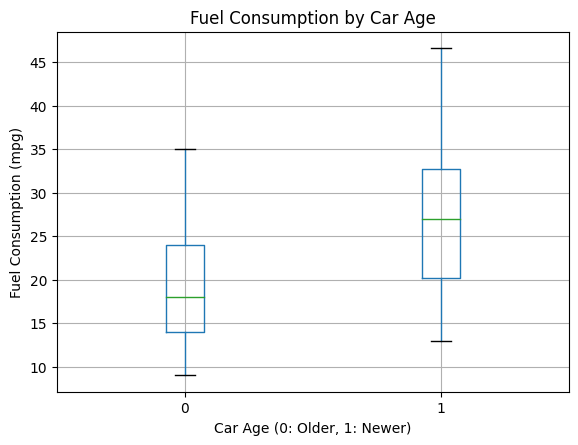

In [31]:
df.boxplot(column='mpg', by='most-recent')

plt.suptitle("")
plt.title("Fuel Consumption by Car Age")
plt.xlabel("Car Age (0: Older, 1: Newer)")
plt.ylabel("Fuel Consumption (mpg)")
plt.show()

5 - Que conclusões podes retirar do boxplot acima? Interprete e explique o plot que acabaste de gerar.

In [ ]:
"""
The boxplot above displays that newer cards (those above 1976) have a less pronounced consumption.
The median of the newer ones is above the Q3 of the older ones, and everything shifts to
higher numbers. Even the minimum of the newer ones is higher than the old ones, and the whisker above
of the newer ones is larger.
Conclusion: Newer == Less Consumption.
Why: More miles per gallon signifies a better fuel efficiency.
"""

6 - O ano de fabrico do carro pode influenciar o seu consumo. Para além do ano de fabrico, é possível relacionar a cilindrada do motor com o consumo de combustível? Utilize um gráfico de dispersão `df.plot.scatter()` para fundamentar a sua resposta e justifique-a.

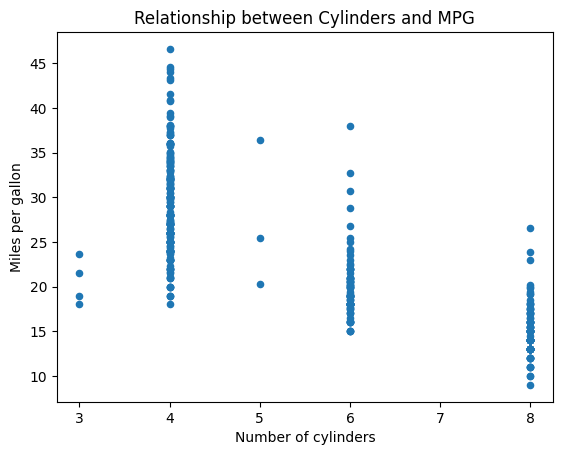

In [34]:
df.plot.scatter(x='cylinders', y='mpg')

plt.xlabel("Number of cylinders")
plt.ylabel("Miles per gallon")
plt.title("Relationship between Cylinders and MPG")
plt.show()

In [ ]:
"""
It can be observed that less cylinders correlate to more miles per gallon.
While the number of cylinders decrease, the miles per gallon increase, which signifies better efficiency
(you want your car to have as many miles as you can per gallon)
"""

7 - Para complementar a análise acima, crie dois diagramas de dispersão separados que relacionem o consumo (mpg) e a potência (horsepower). Um dos diagramas deve conter apenas carros com 4 cilindros e o outro apenas carros com 8 cilindros.

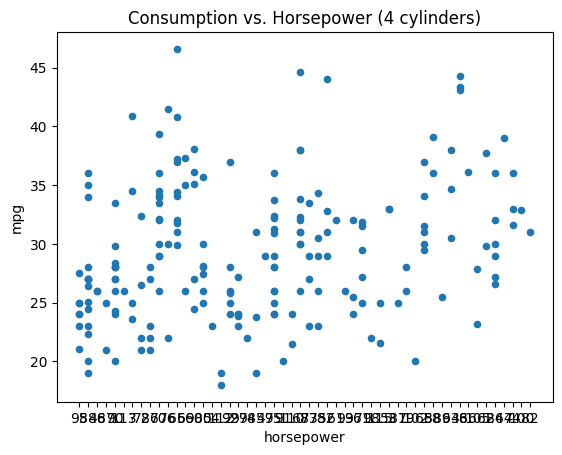

In [42]:
# Cars with 4 cylinders
df_4_cylinders = df[df['cylinders'] == 4]

# Scatterplot that relates horpower with consumtpion
df_4_cylinders.plot.scatter(x='horsepower', y='mpg')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("Consumption vs. Horsepower (4 cylinders)")

plt.show()

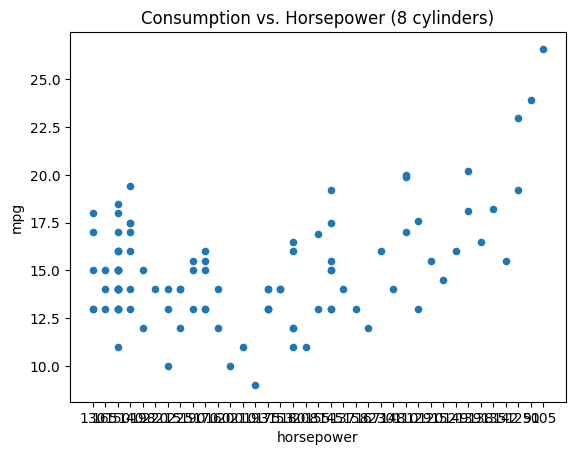

In [48]:
# Cars with 8 cylinders
df_8_cylinders = df[df['cylinders'] == 8]

# Scatterplot that relates horsepower with consumption
df_8_cylinders.plot.scatter(x='horsepower', y='mpg')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("Consumption vs. Horsepower (8 cylinders)")

plt.show()

8 - Que conclusões podes tirar dos resultados apresentados acima?

In [ ]:
"""
There are many more cards with 4 cylinders than 8 (probably because of the time)

In the 4 cylinder plot we can see a more varied outputs, but in the 8 cylinders
it can be noted that some of them have a higher efficiency than others while increasing
their horsepower, but is nothing in comparation with the range that 4 cylinders mpg display.

Conclussion: 4 cylinders are more efficient than 8 cylinders.
"""

9 - Por fim, qual fabricante tem carros com menor consumo de combustível? Utilize um boxplot para justificar a sua resposta.

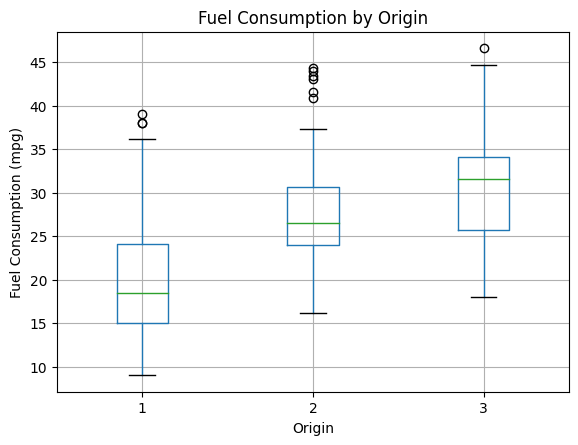

In [50]:
# From Auto-Data:
# origin: Origin of car (1. American, 2. European, 3. Japanese)
df.boxplot(column='mpg', by='origin')

plt.suptitle("") # To delete the default
plt.title("Fuel Consumption by Origin")
plt.xlabel("Origin")
plt.ylabel("Fuel Consumption (mpg)")

plt.show()

In [ ]:
"""
It can be safely said that Japanese manufacturers fabricate more efficient cars in terms of
consumption
Why: More miles per gallon signifies a better fuel efficiency.
"""